In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Carrega o dataset como dataframe
df = pd.read_csv('dataset/video_games_2016.csv')

In [27]:
# Remove outliers
Q1 = df['Global_Sales'].quantile(0.00)
Q3 = df['Global_Sales'].quantile(0.98)

df = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

In [28]:

"""
fill_0 = [
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
]

fill_mean = [
    'Year_of_Release',
    'Global_Sales'
]

for c in fill_0 :
    df[c] = df[c].fillna(0)

for c in fill_mean :
    df[c] = df[c].fillna(df[c].mean())
"""

'\nfill_0 = [\n    "Critic_Score",\n    "Critic_Count",\n    "User_Score",\n    "User_Count",\n]\n\nfill_mean = [\n    \'Year_of_Release\',\n    \'Global_Sales\'\n]\n\nfor c in fill_0 :\n    df[c] = df[c].fillna(0)\n\nfor c in fill_mean :\n    df[c] = df[c].fillna(df[c].mean())\n'

In [29]:
# Cria coluna com a região que mais vendeu
column_to_number = {
    'NA_Sales':    "NA",
    'EU_Sales':    "EU",
    'JP_Sales':    "JP",
    'Other_Sales': "Outro" 
}

df['Greatest'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1).map(column_to_number)

In [30]:
print ( df["Critic_Score"].isna().sum() )
print ( df["Critic_Count"].isna().sum() )

8478
8478


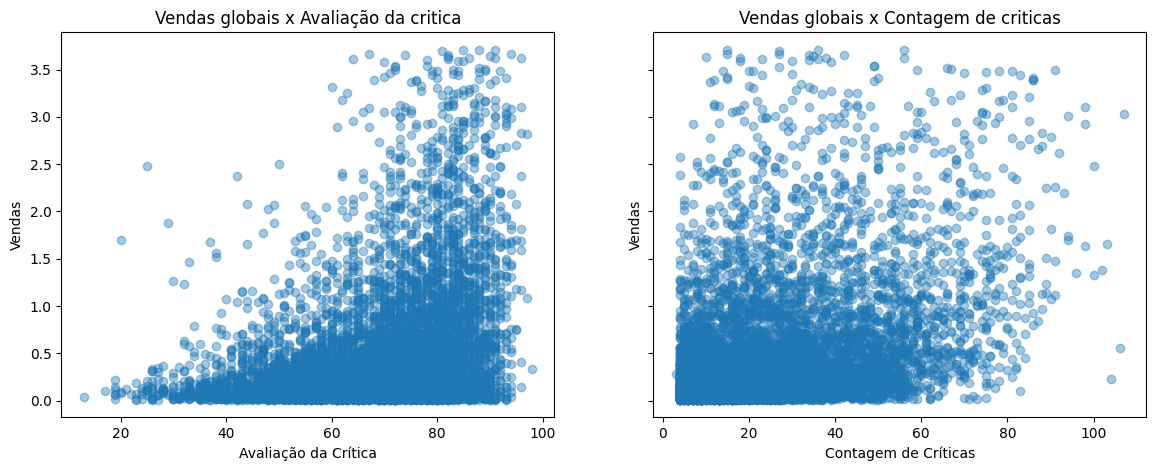

In [31]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

fdf = df.copy()
fdf = fdf[ fdf["Global_Sales"] > 0 ]

axes[0].set_title('Vendas globais x Avaliação da critica')
axes[0].scatter( 
  fdf['Critic_Score'],
  fdf['Global_Sales'],
  alpha=.4
)

axes[0].set_xlabel('Avaliação da Crítica')
axes[0].set_ylabel('Vendas')

axes[1].set_title('Vendas globais x Contagem de criticas')
axes[1].scatter( 
  fdf['Critic_Count'],
  fdf['Global_Sales'],
  alpha=.4
)

axes[1].set_xlabel('Contagem de Críticas')
axes[1].set_ylabel('Vendas')

plt.show()

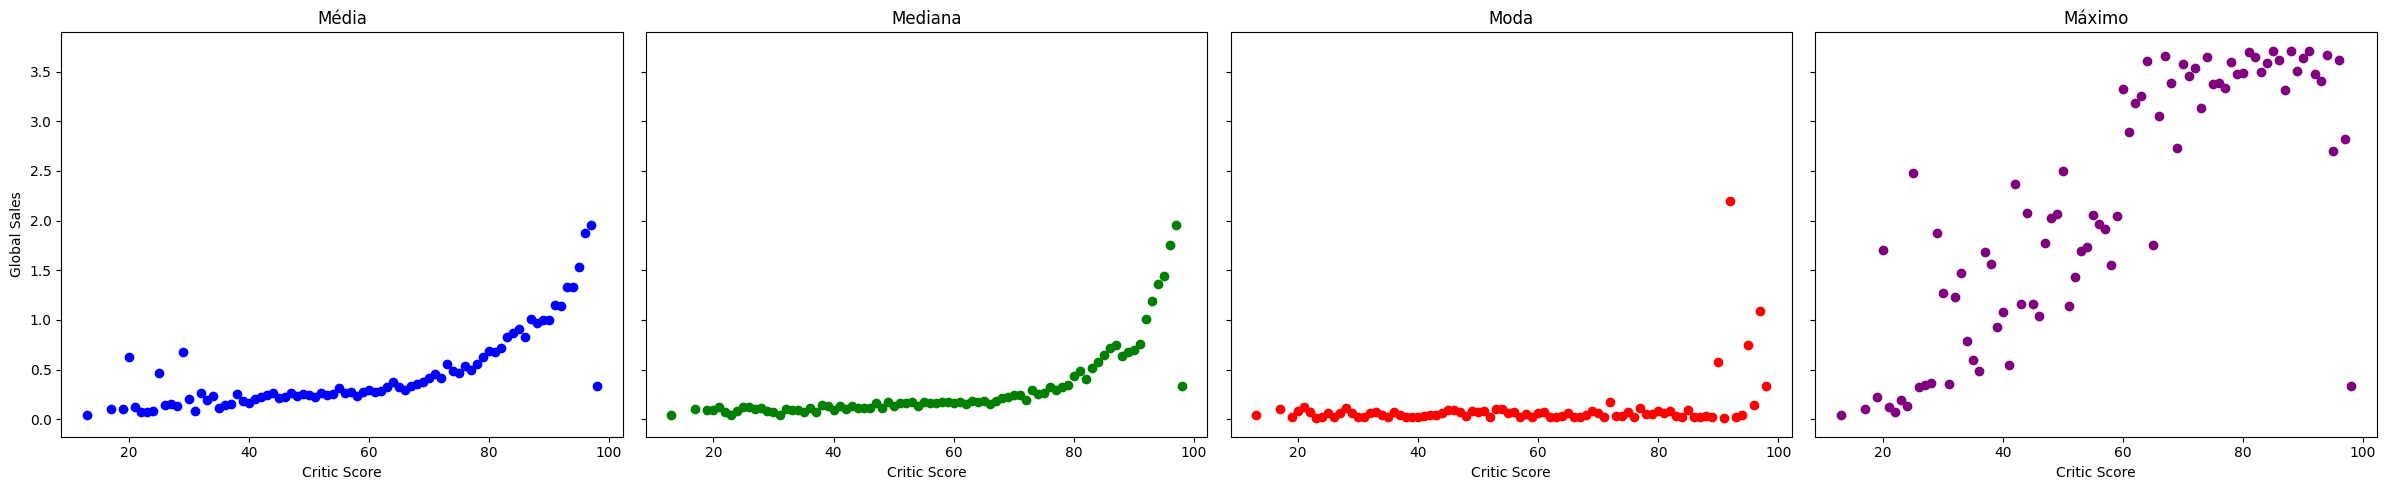

In [32]:

media =   fdf.groupby('Critic_Score')['Global_Sales'].mean().reset_index()
mediana = fdf.groupby('Critic_Score')['Global_Sales'].median().reset_index()
moda =    fdf.groupby('Critic_Score')['Global_Sales'].apply(lambda x: x.mode().iloc[0]).reset_index()
maxi =    fdf.groupby('Critic_Score')['Global_Sales'].max().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(24, 5), sharey=True)

axes[0].scatter(media['Critic_Score'], media['Global_Sales'], color='blue')
axes[0].set_title('Média')
axes[0].set_xlabel('Critic Score')
axes[0].set_ylabel('Global Sales')

axes[1].scatter(mediana['Critic_Score'], mediana['Global_Sales'], color='green')
axes[1].set_title('Mediana')
axes[1].set_xlabel('Critic Score')

axes[2].scatter(moda['Critic_Score'], moda['Global_Sales'], color='red')
axes[2].set_title('Moda')
axes[2].set_xlabel('Critic Score')

axes[3].scatter(maxi['Critic_Score'], maxi['Global_Sales'], color='purple')
axes[3].set_title('Máximo')
axes[3].set_xlabel('Critic Score')

# Display the plots
plt.tight_layout()
plt.show()

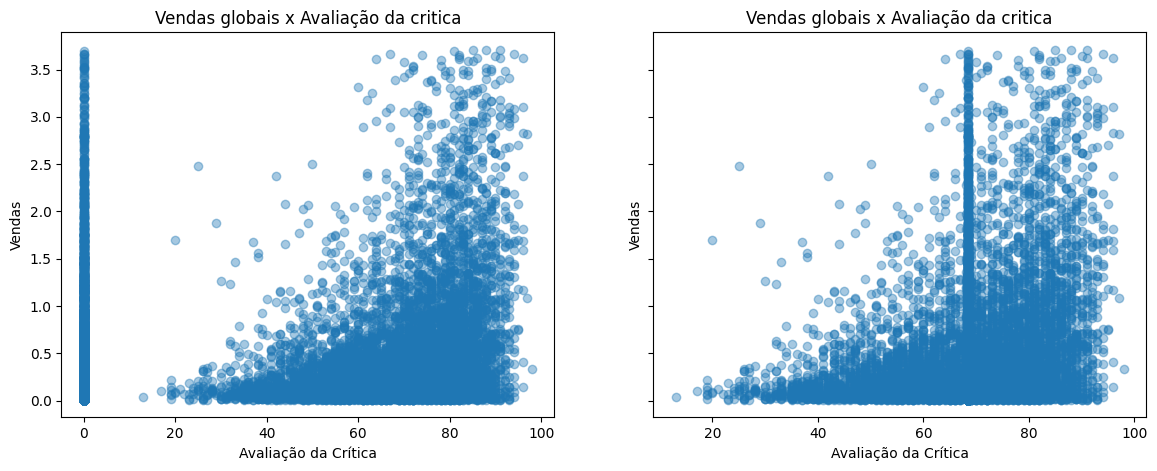

In [33]:
fdf = df.copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

tgt = 'Critic_Score' 

for i in range(2) :
  f = i * fdf[tgt].mean() 

  axes[i].set_title('Vendas globais x Avaliação da critica')
  axes[i].scatter( 
    fdf[tgt].fillna( f ),
    fdf['Global_Sales'],
    alpha=.4
  )

  axes[i].set_xlabel('Avaliação da Crítica')
  axes[i].set_ylabel('Vendas')

In [34]:
fdf = df.copy().dropna()

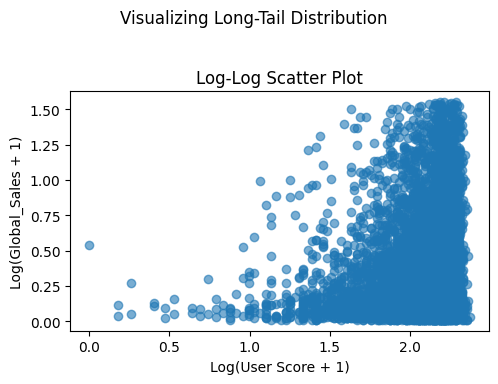

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
fig.suptitle("Visualizing Long-Tail Distribution")

# 1. Log-Log Scatter Plot
axes.scatter(np.log1p(df["User_Score"]), np.log1p(df["Global_Sales"]), alpha=0.6)
axes.set_title("Log-Log Scatter Plot")
axes.set_xlabel("Log(User Score + 1)")
axes.set_ylabel("Log(Global_Sales + 1)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

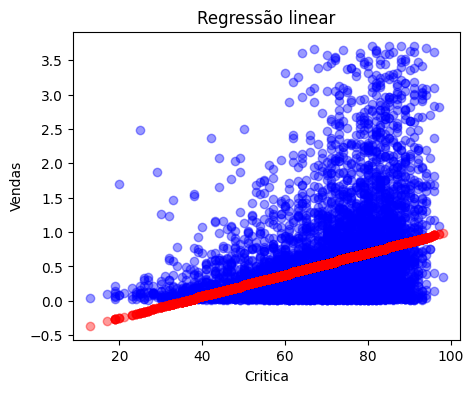

R²: 0.10681191691822822


In [37]:
xcol = [ "Critic_Score" ]
ycol = "Global_Sales"

X = fdf[xcol].values
y = fdf[ycol].values

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(5, 4))
plt.scatter(X, y, color='blue', label='Real', alpha=0.4)
plt.scatter(X, y_pred, color='red', label='Predição', alpha=.4)
plt.title('Regressão linear')
plt.xlabel("Critica")
plt.ylabel("Vendas")
plt.show()

print( f"R²: {model.score(X, y)}" )


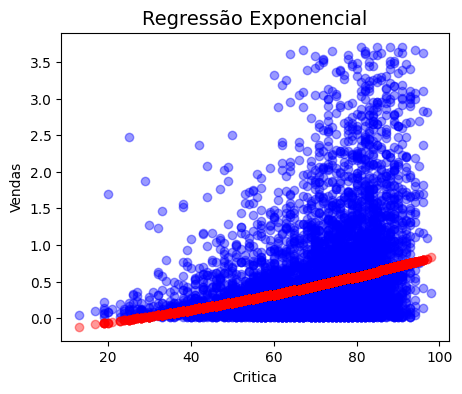

R²: 0.11997889528453987


In [38]:

xcol = [ "Critic_Score" ]
ycol = "Global_Sales"

X = fdf[xcol].values
y = fdf[ycol].values

y = np.log1p( y )

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(5, 4))

plt.scatter(X, np.expm1(y), color='blue', label='Real', alpha=0.4)
plt.scatter(X, np.expm1(y_pred), color='red', label='Predição', alpha=.4)

plt.title('Regressão Exponencial', fontsize=14)
plt.xlabel("Critica")
plt.ylabel("Vendas")
plt.show()

print( f"R²: {model.score(X, y)}" )


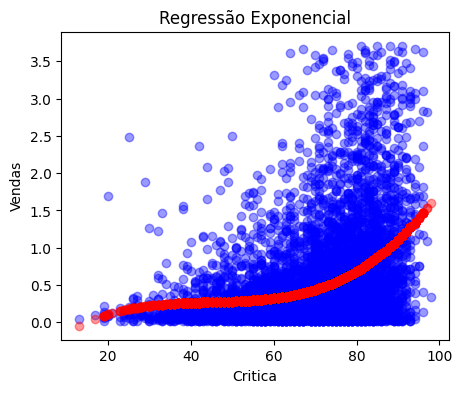

R²: 0.1373698251409522


In [39]:

xcol = [ "Critic_Score" ]
ycol = "Global_Sales"

X = fdf[xcol]
y = fdf[ycol]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.figure(figsize=(5, 4))

plt.scatter(X, (y), color='blue', label='Real', alpha=0.4)
plt.scatter(X, (y_pred), color='red', label='Predição', alpha=.4)

plt.title('Regressão Exponencial')
plt.xlabel("Critica")
plt.ylabel("Vendas")
plt.show()

print( f"R²: {model.score(X_poly, y)}" )


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

fdf = df.copy()

train_data = fdf[fdf['Critic_Score'].notna()]
predict_data = fdf[fdf['Critic_Score'].isna()]

train_data_count   = fdf[fdf['Critic_Count'].notna()]
predict_data_count = fdf[fdf['Critic_Count'].isna()]

categoricos = [
    'Genre', 
    'Platform',
    'Greatest',
    'Publisher',
]

numericos = [
    'Global_Sales',
    'NA_Sales',
    'EU_Sales',
    'JP_Sales',
    'Other_Sales'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricos),
        ('num', 'passthrough', numericos)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train = train_data[categoricos + numericos]
y_train = train_data['Critic_Score']

model.fit(X_train, y_train)

X_predict = predict_data[categoricos + numericos]
predicted_scores = model.predict(X_predict)

print(r2_score( y_train, model.predict( X_train ) ))

X_train = train_data_count[categoricos + numericos]
y_train = train_data_count['Critic_Count']

model.fit(X_train, y_train)

X_predict = predict_data[categoricos + numericos]
predicted_count = model.predict(X_predict)
print(r2_score( y_train, model.predict( X_train ) ))


fdf.loc[fdf['Critic_Score'].isna(), 'Critic_Score'] = predicted_scores
fdf.loc[fdf['Critic_Count'].isna(), 'Critic_Count'] = predicted_count


print(fdf)


0.9003350991714609
0.9307220670236442
                                  Name Platform  Year_of_Release       Genre  \
335                  Super Paper Mario      Wii           2007.0    Platform   
336          Spyro: Year of the Dragon       PS           2000.0    Platform   
337    Assassin's Creed IV: Black Flag      PS3           2013.0      Action   
338                   FIFA Soccer 2005      PS2           2004.0      Sports   
339          Pokémon Trading Card Game       GB           1998.0    Strategy   
...                                ...      ...              ...         ...   
16714    Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16715                 LMA Manager 2007     X360           2006.0      Sports   
16716          Haitaka no Psychedelica      PSV           2016.0   Adventure   
16717                 Spirits & Spells      GBA           2003.0    Platform   
16718              Winning Post 8 2016      PSV           2016.0  Simulation   

 

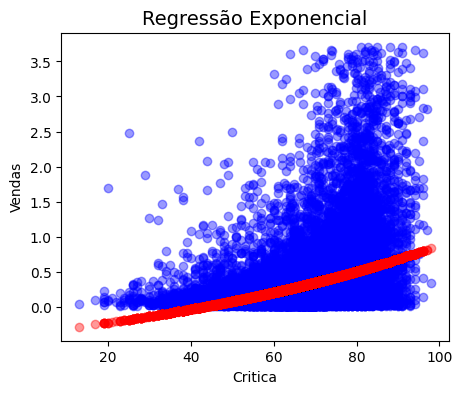

R²: 0.163457642336304


In [41]:

xcol = [ "Critic_Score" ]
ycol = "Global_Sales"

X = fdf[xcol].values
y = fdf[ycol].values

y = np.log1p( y )

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(5, 4))

plt.scatter(X, np.expm1(y), color='blue', label='Real', alpha=0.4)
plt.scatter(X, np.expm1(y_pred), color='red', label='Predição', alpha=.4)

plt.title('Regressão Exponencial', fontsize=14)
plt.xlabel("Critica")
plt.ylabel("Vendas")
plt.show()

print( f"R²: {model.score(X, y)}" )


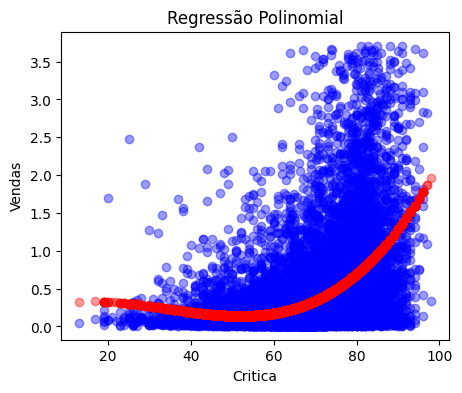

R²: 0.2180819242216715


In [50]:

xcol = [ "Critic_Score" ]
ycol = "Global_Sales"

X = fdf[xcol].values
y = fdf[ycol].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.figure(figsize=(5, 4))

plt.scatter(X, (y), color='blue', label='Real', alpha=0.4)
plt.scatter(X, (y_pred), color='red', label='Predição', alpha=.4)

plt.title('Regressão Polinomial')
plt.xlabel("Critica")
plt.ylabel("Vendas")
plt.show()

print( f"R²: {model.score(X_poly, y)}" )


Text(0, 0.5, 'Vendas')

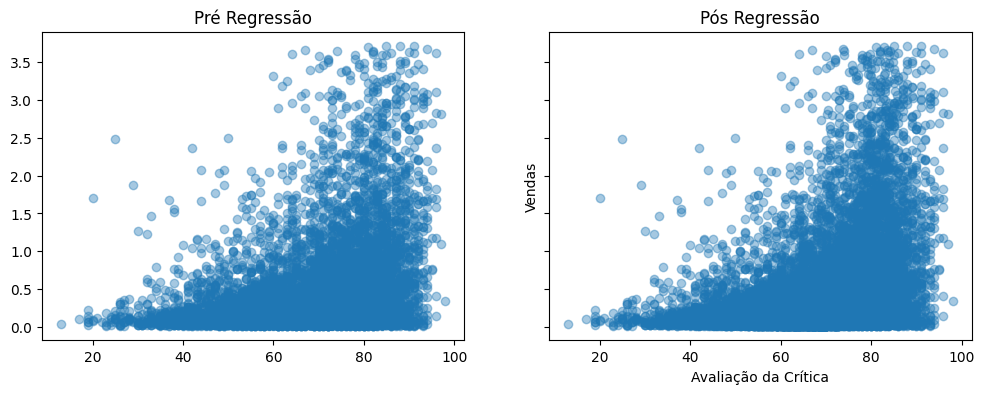

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

tgt = 'Critic_Score' 

axes[0].set_title('Pré Regressão')
axes[0].scatter( 
  df[tgt],
  df['Global_Sales'],
  alpha=.4
)

axes[1].set_xlabel('Avaliação da Crítica')
axes[1].set_ylabel('Vendas')

axes[1].set_title('Pós Regressão')
axes[1].scatter( 
  fdf[tgt],
  fdf['Global_Sales'],
  alpha=.4
)

axes[1].set_xlabel('Avaliação da Crítica')
axes[1].set_ylabel('Vendas')

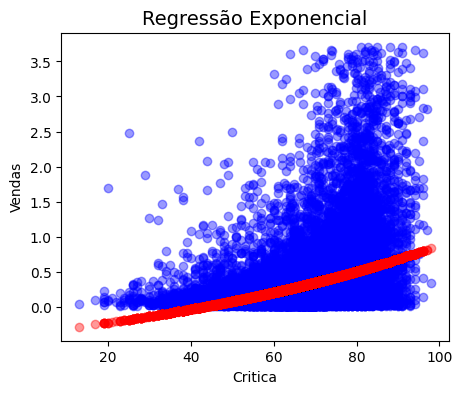

R²: 0.163457642336304


In [ ]:

xcol = [ "Critic_Score" ]
ycol = "Global_Sales"

X = fdf[xcol].values
y = fdf[ycol].values

y = np.log1p( y )

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(5, 4))

plt.scatter(X, np.expm1(y), color='blue', label='Real', alpha=0.4)
plt.scatter(X, np.expm1(y_pred), color='red', label='Predição', alpha=.4)

plt.title('Regressão Exponencial', fontsize=14)
plt.xlabel("Critica")
plt.ylabel("Vendas")
plt.show()

print( f"R²: {model.score(X, y)}" )


In [44]:
target = 'Global_Sales'

numericos = [ 
    'Critic_Score',
    'Critic_Count' 
]  

categoricos = [
    'Genre',
    'Platform',
    'Publisher',
    "Developer",
    "Rating"
]  

In [45]:
fdf[categoricos] = fdf[categoricos].fillna('NA')  

X = fdf[numericos + categoricos]
y = fdf[ target ]  

y = np.log(y)

X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.3, random_state=42 )

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', "passthrough", numericos),
        # ('num', PolynomialFeatures(degree=1, include_bias=False) , numericos),
        ('cat', OneHotEncoder(
          drop='first', 
          handle_unknown='ignore'), categoricos)
    ]
)

model_pipeline = Pipeline(
  steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
    ]
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Critic_Score',
                                                   'Critic_Count']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Genre', 'Platform',
                                                   'Publisher', 'Developer',
                                                   'Rating'])])),
                ('regressor', LinearRegression())])

In [47]:
y_pred_log = model_pipeline.predict(X_test)

y_test = np.exp(y_test)
y_pred = np.exp(y_pred_log)

/home/wolke/Documents/datascience/topicos-4/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


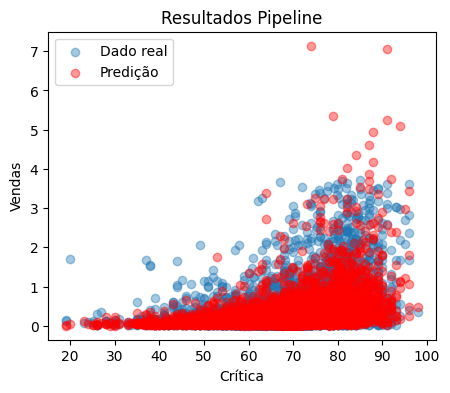

Mean Squared Error: 0.23911192932804518
R-squared: 0.2787919958842743


In [48]:
plt.figure(figsize=(5, 4))

plt.scatter(X_test['Critic_Score'], y_test, alpha=0.4, label='Dado real')
plt.scatter(X_test["Critic_Score"], y_pred, color='red', alpha=0.4, label='Predição')

plt.xlabel('Crítica')
plt.ylabel('Vendas')
plt.title('Resultados Pipeline')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)